In [1]:
import pandas as pd
import requests
import numpy as np
from bs4 import BeautifulSoup
import re 
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
!pip install seaborn
import seaborn as sns
matplotlib.rcParams['pdf.fonttype'] = 42
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

You are using pip version 9.0.3, however version 19.3.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [3]:
df = pd.read_csv("recycling_diversion_capture_rates.csv")
df

,Zone,District,Fiscal Month Number,Fiscal Year,Month Name,Diversion Rate-Total (Total Recycling / Total Waste),Capture Rate-Paper (Total Paper / Max Paper),Capture Rate-MGP (Total MGP / Max MGP),Capture Rate-Total ((Total Recycling - Leaves (Recycling)) / (Max Paper + Max MGP))x100
0,Brooklyn North,BKN01,10,2019,April,14.7,44.9,43.0,44.1
1,Brooklyn North,BKN02,10,2019,April,20.0,34.2,57.9,41.2
2,Brooklyn North,BKN03,10,2019,April,12.2,33.5,44.9,38.2
3,Brooklyn North,BKN04,10,2019,April,15.5,35.2,68.5,48.8
4,Brooklyn North,BKN05,10,2019,April,10.1,22.3,45.1,31.5
5,Brooklyn North,BKN08,10,2019,April,16.4,44.5,59.4,50.6
6,Brooklyn North,BKN09,10,2019,April,14.0,34.0,47.9,39.2
7,Brooklyn North,BKN16,10,2019,April,9.3,20.3,35.2,26.4
8,Brooklyn North,BKN17,10,2019,April,13.4,28.4,60.8,40.7
9,Brooklyn South,BKS06,10,2019,April,29.0,46.4,83.0,57.2


In [7]:
df['time'] = df['Fiscal Year'].astype(str)

In [35]:
df.groupby(['Zone', 'time'])['Diversion Rate-Total (Total Recycling / Total Waste)'].mean().reset_index()

,Zone,time,Diversion Rate-Total (Total Recycling / Total Waste)
0,Bronx,2016,12.861806
1,Bronx,2017,13.192361
2,Bronx,2018,14.000694
3,Bronx,2019,14.404861
4,Brooklyn North,2016,12.787037
5,Brooklyn North,2017,13.449074
6,Brooklyn North,2018,13.986111
7,Brooklyn North,2019,14.415741
8,Brooklyn South,2016,18.735185
9,Brooklyn South,2017,19.255556


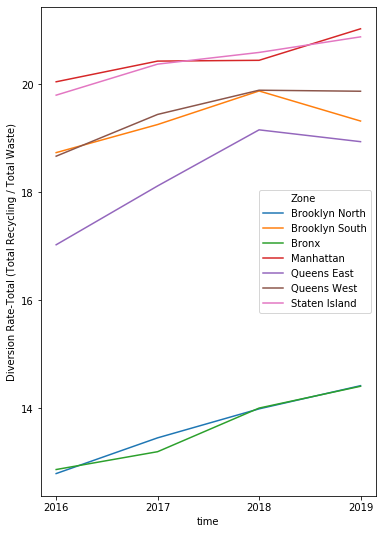

In [52]:
plt.figure(figsize=(6,9))
sns.lineplot(data=df, x='time',
             y='Diversion Rate-Total (Total Recycling / Total Waste)',
            hue='Zone',ci=None)
plt.savefig('borough_divesion_rate.svg')